Automatically created module for IPython interactive environment


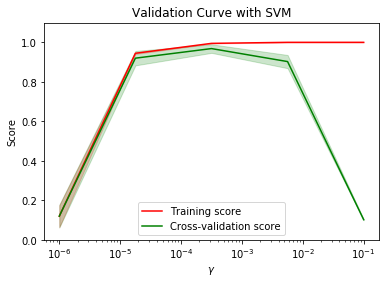

In [1]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

digits = load_digits()
X, y = digits.data, digits.target

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.show()

In [2]:
#构造Cross validation iterators 交叉验证迭代器代入交叉验证
#1. kflod(3种)
#2. Leave-One-Out - LOO 留一   LPO LOO
#3.  ShuffleSplit 对原始数据进行随机划分，优于kflod，可以自定义train/test比例。

#使用pipline来构造一个管道函数，封装处理流程，transform->transform or classifier

#GridSearchCV(clf, param_grid=params,cv=sfolder)

In [4]:
#StratifiedKFold(y, n_folds=3, shuffle=False, random_state=None),
#StratifiedKFold 分层采样交叉切分，确保训练集，测试集中各类别样本的比例与原始数据集中相同。
# The folds are made by preserving the percentage of samples for each class.
import numpy as np 
from sklearn.model_selection import KFold,StratifiedKFold,cross_val_score,ShuffleSplit,train_test_split,GridSearchCV
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.svm import SVC


X=np.array([
    [1.,2.,3.,4.],
    [11.,12.,13.,14.],
    [21.,22.,23.,24.],
    [31.,32.,33.,34.],
    [41.,42.,43.,44.],
    [51.,52.,53.,54.],
    [61.,62.,63.,64.],
    [71.,72.,73.,74.]
])
 
y=np.array([1,1,0,0,1,1,0,0])
floder = KFold(n_splits=4,random_state=0,shuffle=False)
sfolder = StratifiedKFold(n_splits=4,random_state=0,shuffle=False)
cv = ShuffleSplit(n_splits=4, test_size=0.25, random_state=0)
# lkf = LabelKFold(labels, n_folds=3)

# for train, test in lkf.split(train,test):
#     print("%s %s" % (train, test))
    
for train,test in cv.split(X,y):
    print('%s,%s'% (train,test))
    
for train, test in sfolder.split(X,y):
    print('Train: %s | test: %s' % (train, test))
    
for train, test in floder.split(X,y):
    print('Train1: %s | test1: %s' % (train, test))
    
#传入一个交叉验证迭代器来进行交叉验证，random_state=0,则不随机生成，random= int随机生成，suffle= ture，对数据进行洗牌
#kfload比shufflesplit更专业.
#make_pipeline是pipeline的简化
#管道中的所有估算器（最后一个除外）必须是变换器（即必须有transform方法）,执行完后传给下一个
# anova_svm = Pipeline([('split', sfolder), ('svc', svm.SVC(C=1))])
# anova_svm.set_params(split_n_splits=10, svc__C=.1).fit(X, y)
# anova_svm.score(X, y)

clf = Pipeline([('reduce_dim', PCA()),('svm',SVC(C=1,gamma='auto'))])
#Parameters of the estimators in the pipeline can be accessed using the <estimator>__<parameter> syntax:
clf.set_params(svm__C=10) 
#clf = make_pipeline(sklearn.preprocessing.StandardScaler(), svm.SVC(C=1))
cross_val_score(clf, X,y, cv=sfolder)#scoring='f1_weighted' 通过scoring来选择分数计算方式。
for s in clf.steps:
    print(s)

params = dict(reduce_dim__n_components=[2, 5, 10],
              svm__C=[0.1, 10, 100],svm_gamma=[-2,2,4])

grid_search = GridSearchCV(clf, param_grid=params,cv=sfolder)
grid_search

[1 7 3 0 5 4],[6 2]
[3 7 0 4 2 5],[1 6]
[3 4 7 0 6 1],[5 2]
[6 7 3 4 1 0],[2 5]
Train: [1 3 4 5 6 7] | test: [0 2]
Train: [0 2 4 5 6 7] | test: [1 3]
Train: [0 1 2 3 5 7] | test: [4 6]
Train: [0 1 2 3 4 6] | test: [5 7]
Train1: [2 3 4 5 6 7] | test1: [0 1]
Train1: [0 1 4 5 6 7] | test1: [2 3]
Train1: [0 1 2 3 6 7] | test1: [4 5]
Train1: [0 1 2 3 4 5] | test1: [6 7]
('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))
('svm', SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=0, shuffle=False),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('svm', SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'svm__C': [0.1, 10, 100], 'svm_gamma': [-2, 2, 4], 'reduce_dim__n_components': [2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [5]:
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
#使用FeatureUnion。。。
estimators = [('linear_pca', PCA()), ('kernel_pca', KernelPCA())]
combined = FeatureUnion(estimators)
combined 

FeatureUnion(n_jobs=None,
       transformer_list=[('linear_pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('kernel_pca', KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=None, kernel='linear',
     kernel_params=None, max_iter=None, n_components=None, n_jobs=None,
     random_state=None, remove_zero_eig=False, tol=0))],
       transformer_weights=None)

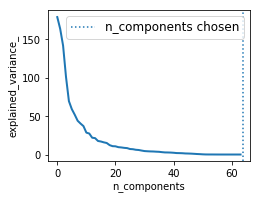

In [6]:
#a sample use gridsearchcv
import warnings
warnings.filterwarnings("ignore")

# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause


import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

logistic = linear_model.LogisticRegression(multi_class='auto',solver='lbfgs')

pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

###############################################################################
# Plot the PCA spectrum
pca.fit(X_digits)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

###############################################################################
# Prediction

n_components = [20, 40, 64]
Cs = np.logspace(-4, 4, 3)

#Parameters of pipelines can be set using ‘__’ separated parameter names:

estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                              logistic__C=Cs),cv =5)
estimator.fit(X_digits, y_digits)

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
#cvCanshu 
plt.legend(prop=dict(size=12)) #设置字体
plt.show()



In [7]:
# another example gridsearvhcv
from sklearn import datasets
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
 
# Loading the Digits dataset
digits = datasets.load_digits()
 
# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target
 
# 将数据集分成训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)
 
# 设置gridsearch的参数
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
 
#设置模型评估的方法.如果不清楚,可以参考上面的k-fold章节里面的超链接
scores = ['precision', 'recall']
 
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
 
    #构造这个GridSearch的分类器,5-fold
    clf = GridSearchCV(SVC(decision_function_shape='ovr'), tuned_parameters, cv=5,
                       scoring='%s_weighted' % score)
    #只在训练集上面做k-fold,然后返回最优的模型参数
    clf.fit(X_train, y_train)
 
    print("Best parameters set found on development set:")
    print()
    #输出最优的模型参数
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    #print(dir(clf))
#     print(clf.best_estimator_)
#    print(len(clf.cv_results_))
 
    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    #在测试集上测试最优的模型的泛化能力.
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'kernel': 'rbf', 'gamma': 0.001, 'C': 10}

Grid scores on development set:
Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       0.97      1.00      0.98        90
           2       0.99      0.98      0.98        92
           3       1.00      0.99      0.99        93
           4       1.00      1.00      1.00        76
           5       0.99      0.98      0.99       108
           6       0.99      1.00      0.99        89
           7       0.99      1.00      0.99        78
           8       1.00      0.98      0.99        92
           9       0.99      0.99      0.99        92

   micro avg       0.99      0.99      0.99       899
   macro avg       0.99      0.99      0.99       

In [8]:
# use the gridsearch 集成学习  多参数
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

iris = datasets.load_iris()
param_grid = {"base_estimator__criterion": ["gini", "entropy"],
          "base_estimator__splitter":   ["best", "random"],
          "n_estimators": [1, 2]}

dtc = DecisionTreeClassifier()
ada = AdaBoostClassifier(base_estimator=dtc)
X, y = datasets.make_hastie_10_2(n_samples=12000, random_state=1)
print(X[1], y[1])

grid_search_ada = GridSearchCV(ada, param_grid=param_grid, cv=10)
grid_search_ada.fit(X, y)
grid_search_ada.best_params_

[ 1.46210794 -2.06014071 -0.3224172  -0.38405435  1.13376944 -1.09989127
 -0.17242821 -0.87785842  0.04221375  0.58281521] 1.0


{'base_estimator__criterion': 'entropy',
 'base_estimator__splitter': 'best',
 'n_estimators': 1}

In [12]:
#  grid和pipeline结合形式2
from sklearn.svm import SVC
my_svc = SVC()
parameters = {'kernel':('linear','rbf'), 'C':[1, 2], 'gamma':[0.125, 0.5]}

X, y = datasets.make_hastie_10_2(n_samples=12000, random_state=1)

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
# 构建pipeline
pipe_svc = Pipeline([('sc', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', GridSearchCV(my_svc, parameters, n_jobs=-1))
                    ])
 
pipe_svc.fit(X,y)
print('Test accuracy: %.3f' % pipe_svc.score(X, y))

Test accuracy: 0.647


In [19]:
#knn grid
#对grid使用待了解
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
data = iris.data
label = iris.target
X_train,X_test,y_train,y_test = train_test_split(data,label,test_size=0.3,random_state=2)
knn_clf = KNeighborsClassifier()
param_grid = [
    {
        'weights':['uniform'],
        'n_neighbors':[i for i in range(1,11)]
    },
    {
        'weights':['distance'],
        'n_neighbors':[i for i in range(1,11)],
        'p':[i for i in range(1,6)]
    }
]
grid_search = GridSearchCV(knn_clf,param_grid,n_jobs=-1,verbose=2)
#verbose：日志冗长度，int：冗长度，0：不输出训练过程，1：偶尔输出，>1：对每个子模型都输出。
grid_search.fit(X_train,y_train)
print('best_estimator_')
print(grid_search.best_estimator_)
print()
print('best_params')
print(grid_search.best_params_)

knn_clf = grid_search.best_estimator_
y_pre = knn_clf.predict(X_test)
knn_clf.score(X_test,y_pre)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


best_estimator_
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

best_params
{'n_neighbors': 6, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.4s finished


1.0